**라이브러리 Import 하기**

In [14]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

**X and Y data (given)**

In [15]:
x_train = [1, 2, 3, 4, 5]
y_train = [3, 5, 7, 9, 11] #y = 2x+1

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length) #평균이 0이고 표준편차가 1인 노이즈를 랜덤생성

y_train = y_train + y_noise
#노이즈 수동으로 줘도 됨

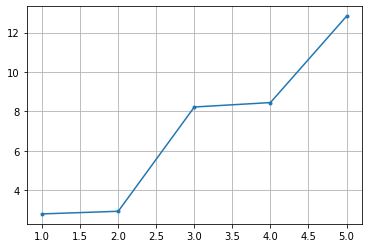

In [16]:
plt.plot(x_train, y_train, '.-')
plt.grid()

**Initialization**

In [17]:
useRandom = False

In [18]:
if useRandom:
  W = tf.Variable(tf.random_normal([1]), name='weight')
  b = tf.Variable(tf.random_normal([1]), name='bias')

else:
  w0 = 8.0;
  b0 = 3.0; #초기값

  W = tf.Variable(w0*tf.ones([1]), name='weight')
  b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis**
$$ H(x)=Wx + b $$

In [19]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**
* loss of one training example : 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [20]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Launch the graph in a session**

In [22]:
sess = tf.Session()

**Initializes global variables in the graph.** 

In [23]:
sess.run(tf.global_variables_initializer())

In [24]:
nb_epoch = 101
vloss = []
vw = []
vb = []

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss) #loss가 작아져야 에러가 줄어듦
    w2 = sess.run(W)
    b2 = sess.run(b)
    vloss.append(loss1)
    vw.append(w2)
    vb.append(b2)

    
    if step % 200 == 0: # 200번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t', b1)

0 	 268.20694 	 6.5848336 	 2.600821


Text(0, 0.5, 'loss')

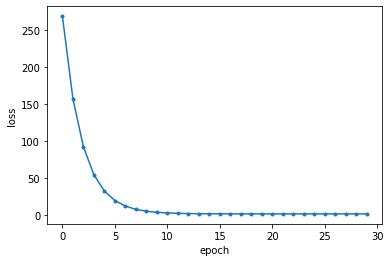

In [25]:
plt.plot(vloss[:30], '.-')
plt.xlabel('epoch')
plt.ylabel('loss')

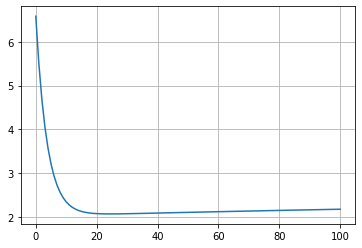

In [26]:
plt.plot(vw)
plt.grid()

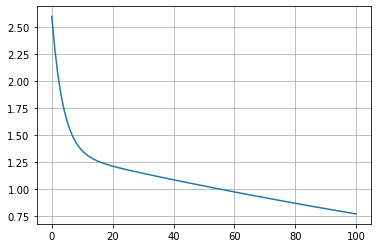

In [27]:
plt.plot(vb)
plt.grid()


**학습완료**

In [28]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [29]:
print(w1, b1)

2.170106 0.7682408


In [30]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 2.170106x + 0.7682408


Text(0.5, 1.0, 'y = 2.170106x + 0.7682408')

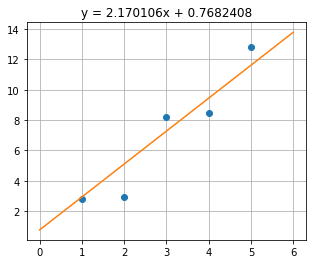

In [31]:
plt.figure(figsize=(5,4))
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)